In [79]:
import os
import glob
import pandas as pd

In [80]:
# Get the file names from ../runs/predict-cls/exp/labels/
path = '../runs/predict-cls/exp18/labels/'
files = glob.glob(path + '*.txt')

# for each file, get the name of the file before the '_' and check if it matches the number at the end of the first line of the file
# if it doesn't match, add the file name to a list
preds = pd.DataFrame(columns=['file','predicted', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th'])
for file in files:
    file_name = file.split('/')[-1]
    actual = file_name.split('_')[0]
    actual = int(actual)
    image_file_path = '../runs/predict-cls/exp18/' + file_name.split('.')[0] + '.jpg'
    with open(file, 'r') as f:
        first_line = f.readline()
        predicted = first_line.split(' ')[1]
        predicted = int(predicted)
        if predicted != actual:
            predicted = str(predicted)
            predicted = '/Users/rz20505/Documents/training_year/applied_data_science/data/uob_image_set_resized/' + predicted + '/'
            # Get the 10 highest predictions
            top_10 = []
            for line in f.readlines():
                prediction = line.split(' ')[1]
                # remove newline
                prediction = prediction[:-1]
                prediction = '/Users/rz20505/Documents/training_year/applied_data_science/data/uob_image_set_resized/' + prediction + '/'
                top_10.append(prediction)

            # Create a dataframe to be populated by information in labels file and appended to preds
            df = pd.DataFrame([[image_file_path, predicted, top_10[0], top_10[1], top_10[2], top_10[3], top_10[4], top_10[5], top_10[6], top_10[7], top_10[8]]], columns=['file','predicted', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th'])
            
            # Append the dataframe to preds using pd.concat
            preds = pd.concat([preds, df], ignore_index=True)
      

In [81]:
# print first item in predicted column
print(preds['2nd'][0])

/Users/rz20505/Documents/training_year/applied_data_science/data/uob_image_set_resized/15544496/


In [82]:
# Turn the folder paths in all columns apart from the file column into lists of file names, preserving the path at the beginning
# each file name must have the full path to the file
for col in preds.columns:
    if col != 'file':
        # preserve the full path to the files
        preds[col] = preds[col].apply(lambda x: glob.glob(x + '*.jpg'))





In [83]:
print(preds['predicted'].loc[0])

['/Users/rz20505/Documents/training_year/applied_data_science/data/uob_image_set_resized/15653990/15653990_0.jpg', '/Users/rz20505/Documents/training_year/applied_data_science/data/uob_image_set_resized/15653990/15653990_1.jpg', '/Users/rz20505/Documents/training_year/applied_data_science/data/uob_image_set_resized/15653990/15653990_3.jpg', '/Users/rz20505/Documents/training_year/applied_data_science/data/uob_image_set_resized/15653990/15653990_2.jpg']


In [84]:
# load the images using the file paths in the preds dataframe and place them in a new dataframe
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in folder:
        img = cv2.imread(filename)
        if img is not None:
            images.append(img)
    return images
# duplicate preds df
preds_paths = preds.copy()

# for each column in preds_paths, apply the load_images_from_folder function to the column
for col in preds.columns:
    if col != 'file':
        preds[col] = preds[col].apply(lambda x: load_images_from_folder(x))
    else:
        preds[col] = preds[col].apply(lambda x: load_images_from_folder([x]))
        

In [85]:
preds['file'].loc[0]

[array([[[222, 223, 237],
         [225, 226, 240],
         [222, 222, 236],
         ...,
         [238, 238, 238],
         [238, 238, 238],
         [238, 238, 238]],
 
        [[225, 226, 240],
         [230, 231, 245],
         [228, 228, 242],
         ...,
         [238, 238, 238],
         [238, 238, 238],
         [238, 238, 238]],
 
        [[224, 225, 239],
         [226, 227, 241],
         [223, 224, 238],
         ...,
         [238, 238, 238],
         [238, 238, 238],
         [238, 238, 238]],
 
        ...,
 
        [[247, 239, 240],
         [246, 238, 239],
         [245, 237, 238],
         ...,
         [233, 233, 233],
         [233, 233, 233],
         [233, 233, 233]],
 
        [[246, 238, 239],
         [246, 238, 239],
         [245, 237, 238],
         ...,
         [232, 232, 232],
         [232, 232, 232],
         [232, 232, 232]],
 
        [[245, 237, 238],
         [245, 237, 238],
         [245, 237, 238],
         ...,
         [232, 232, 232],
  

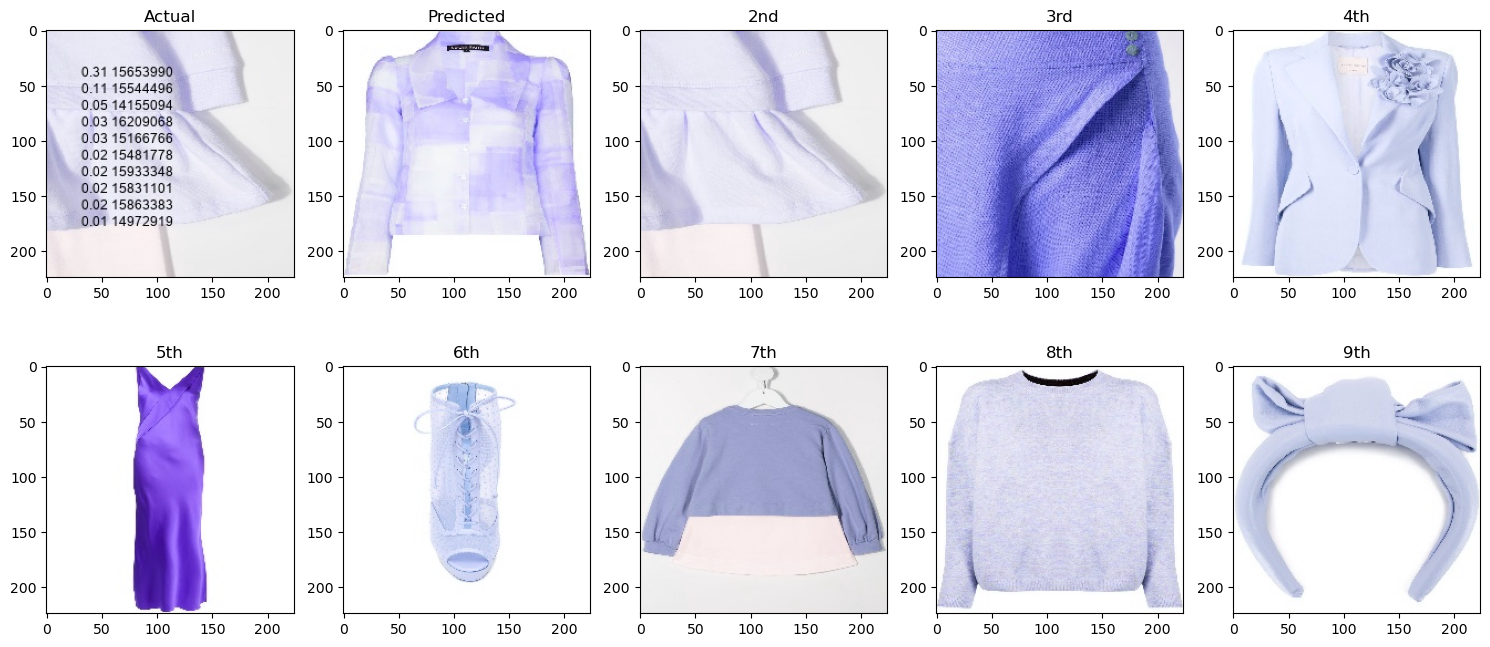

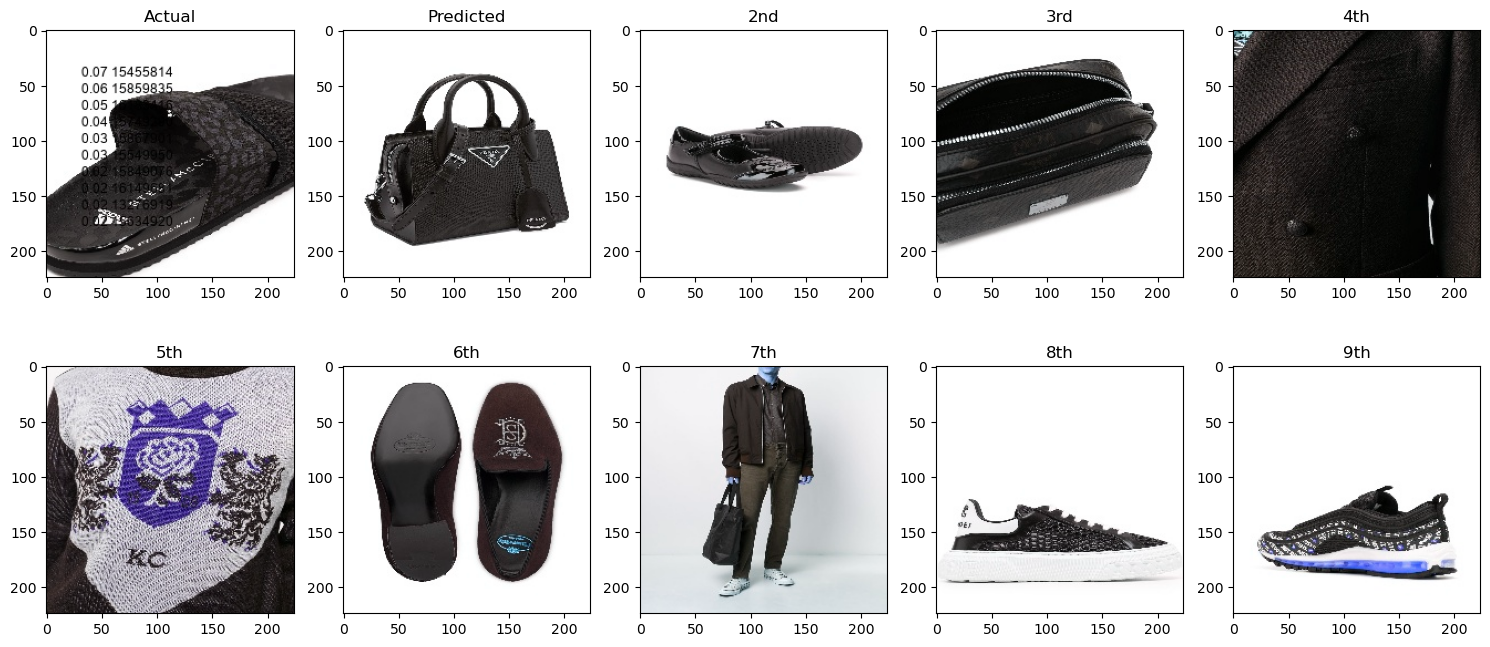

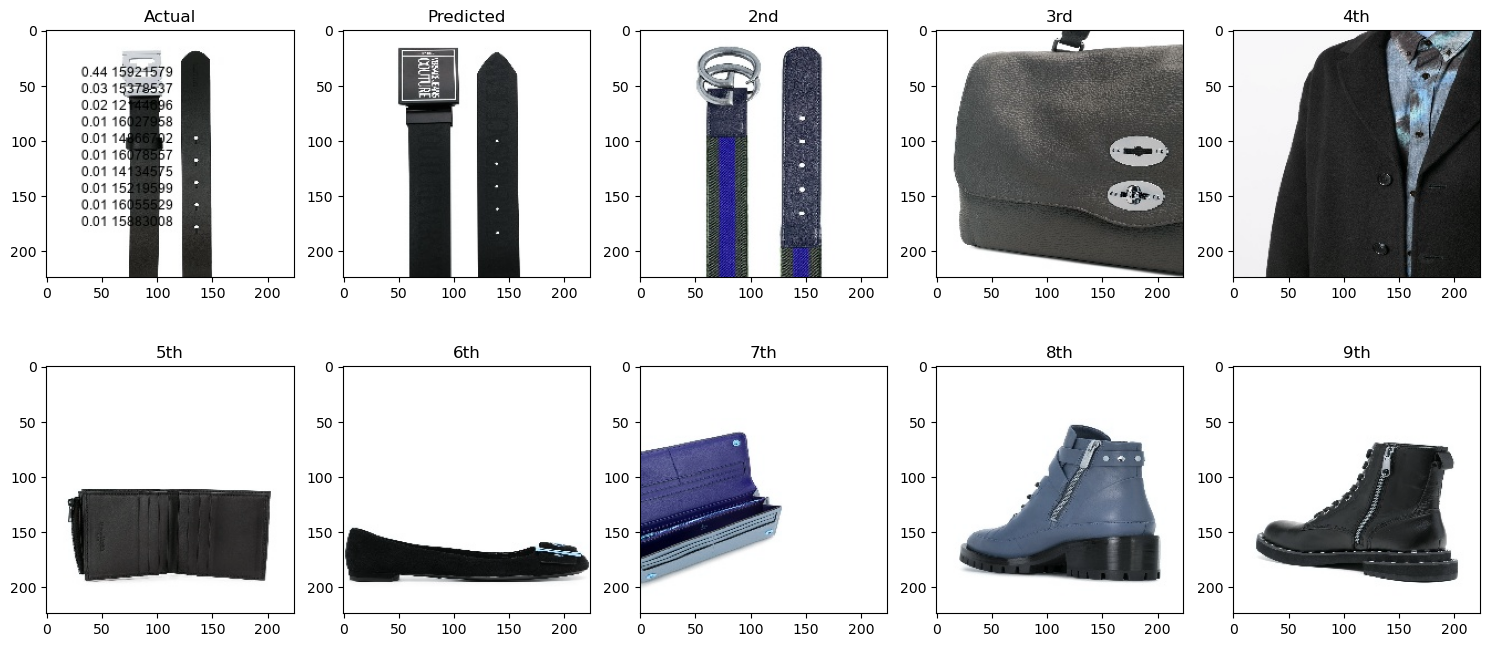

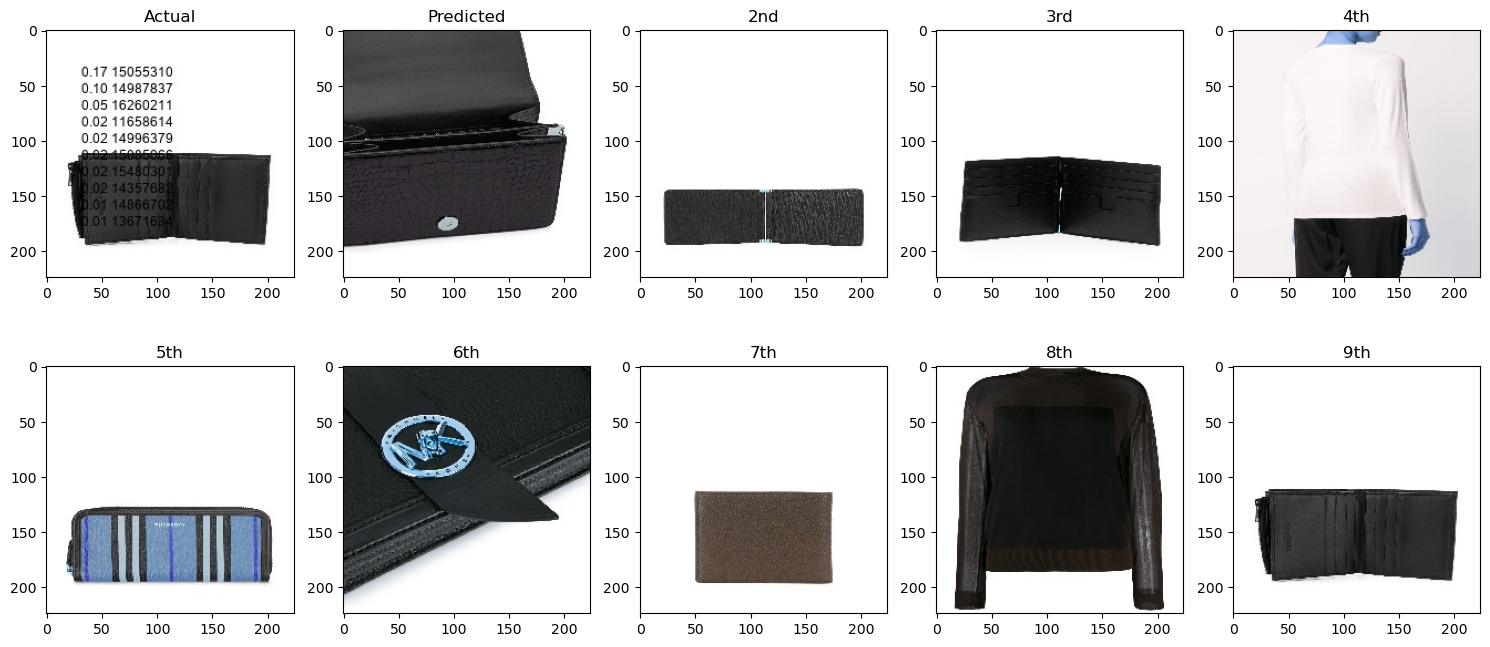

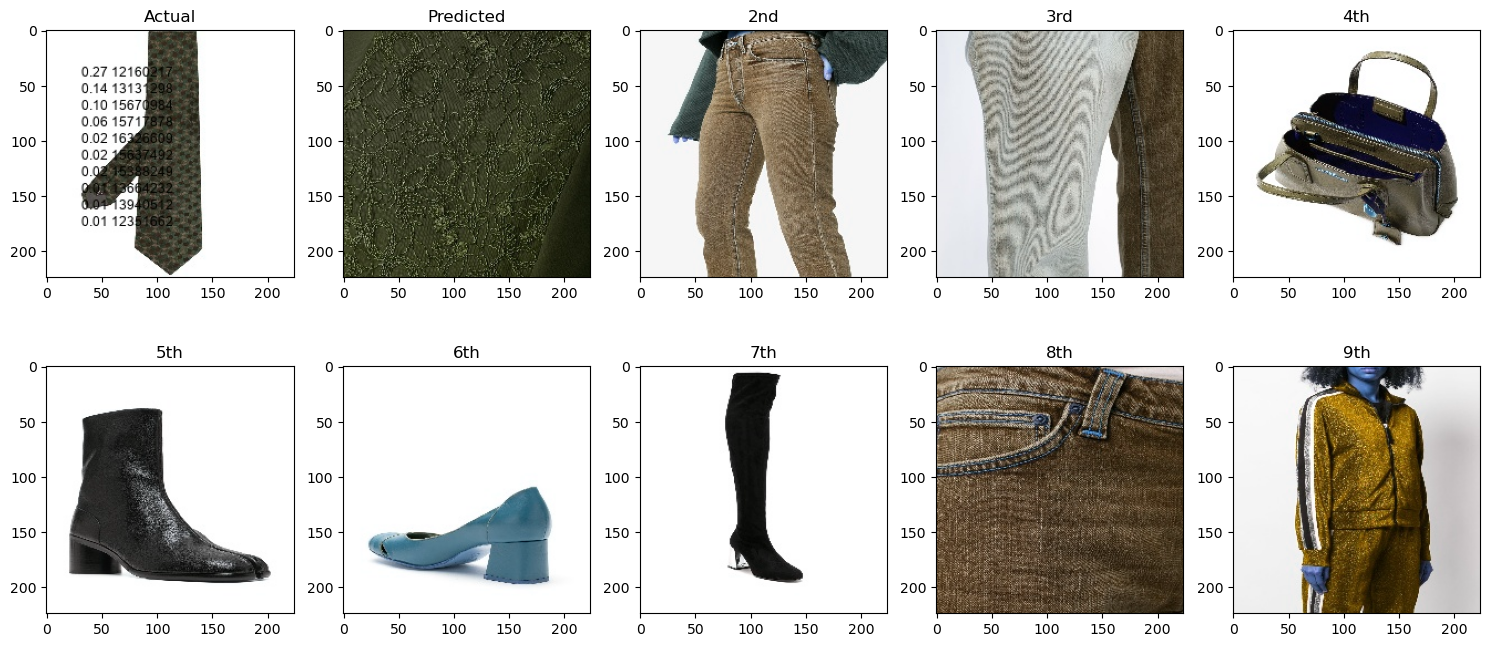

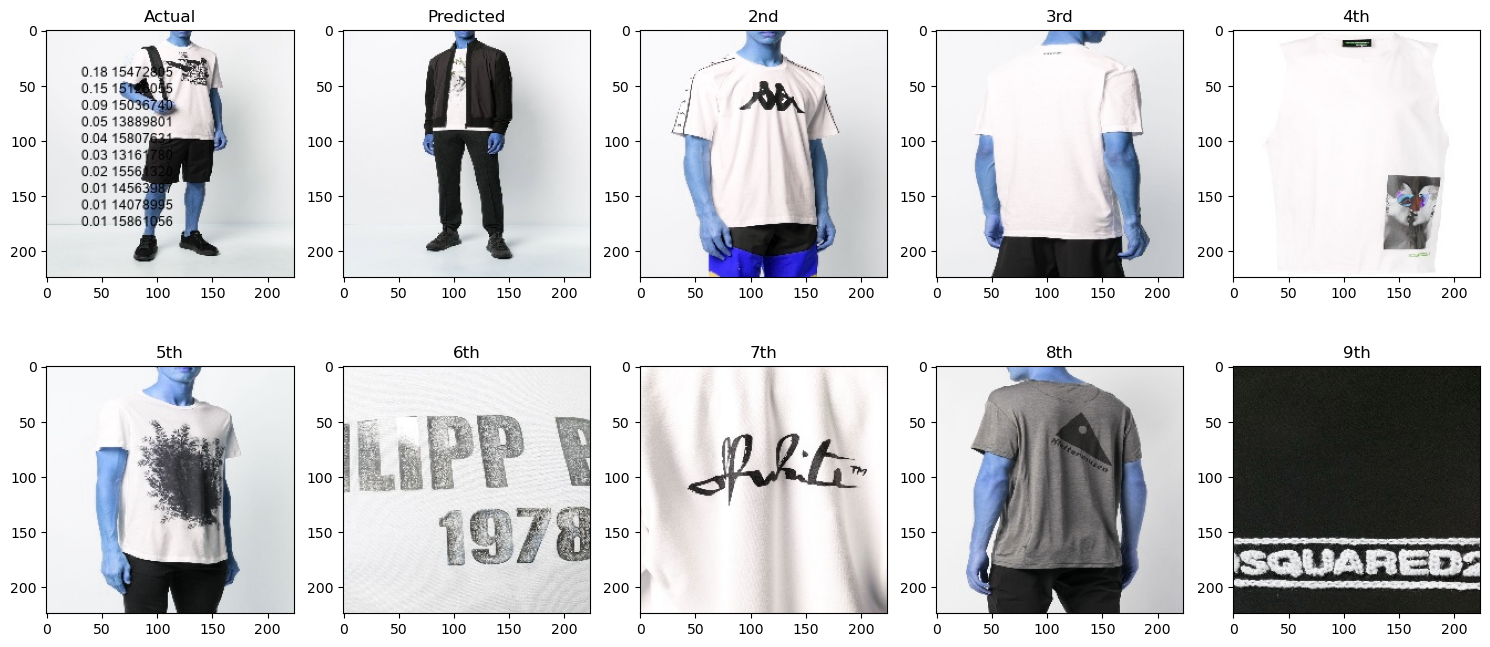

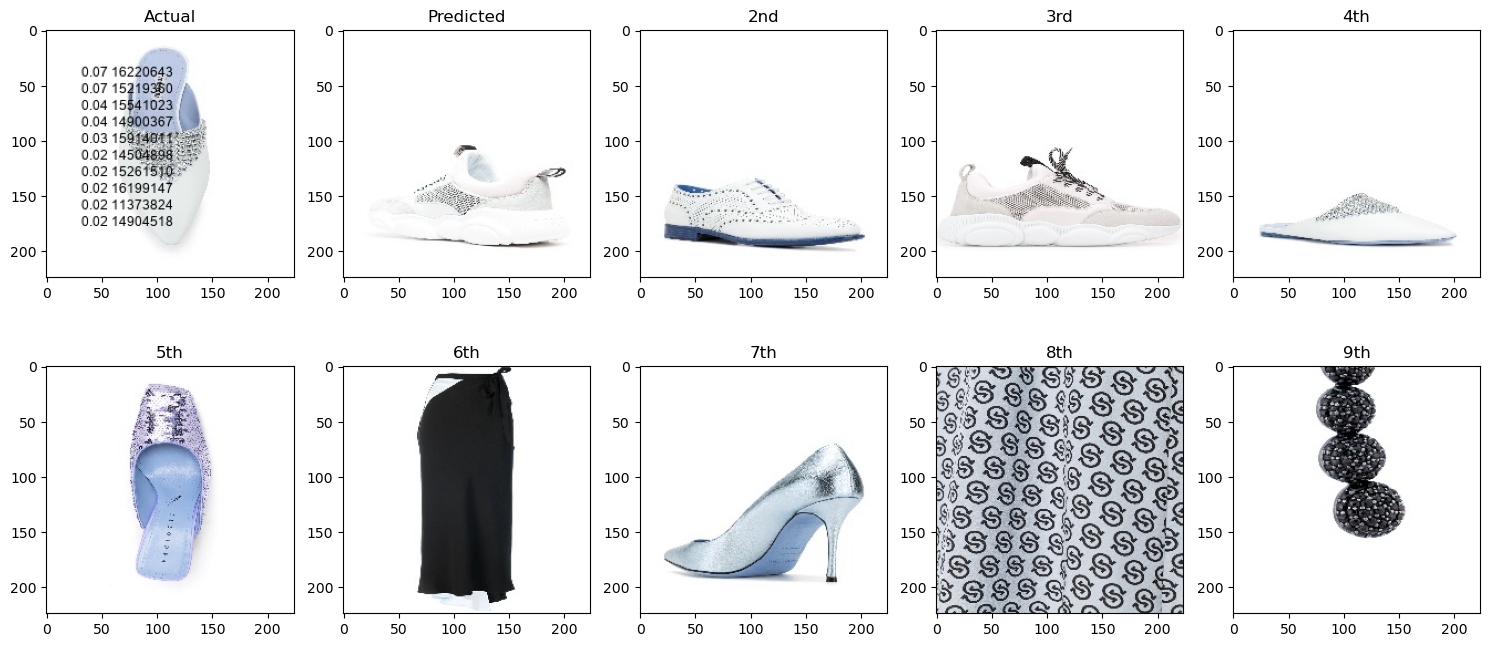

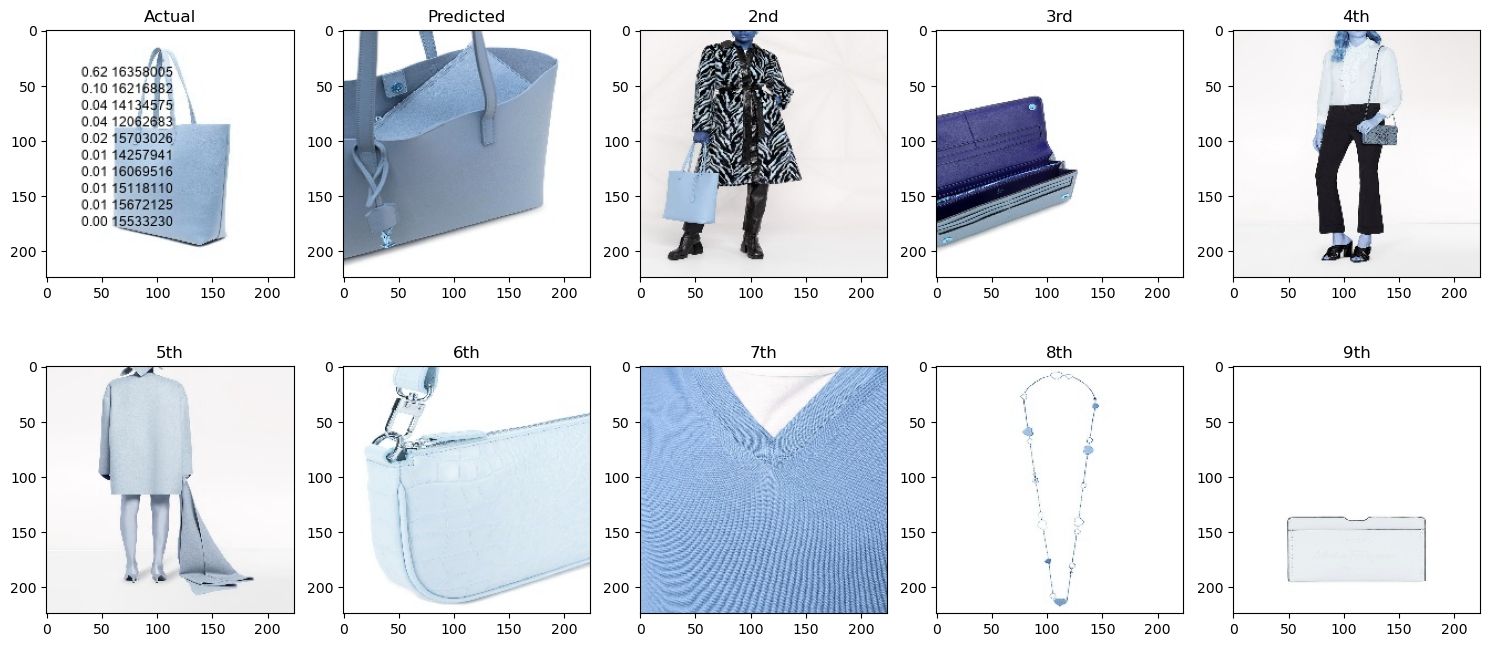

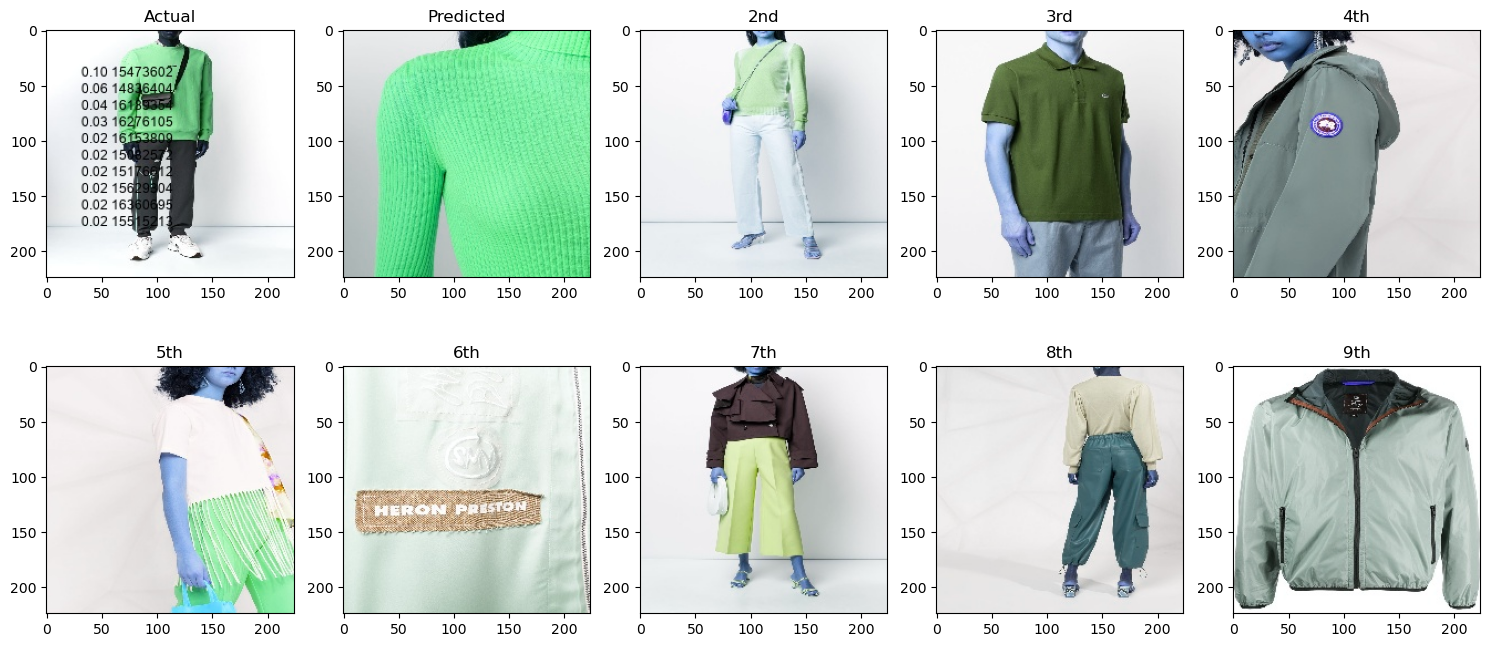

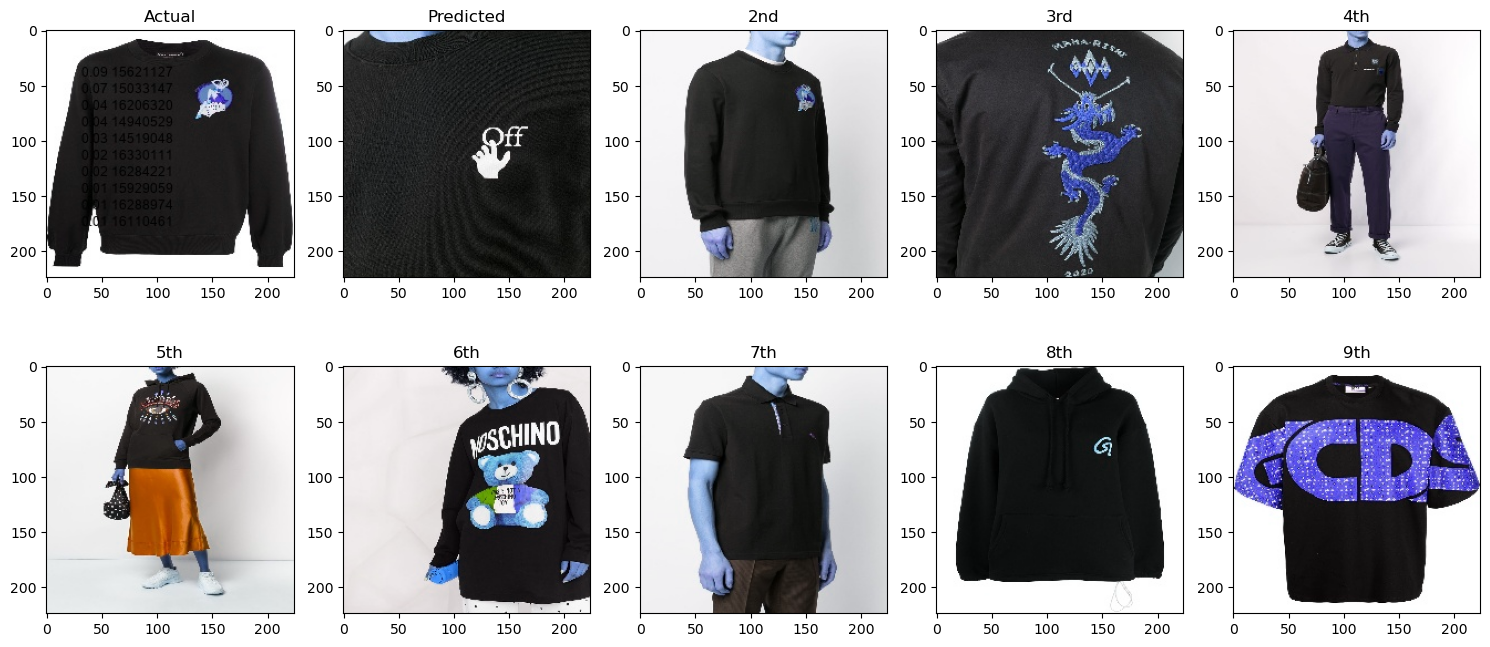

In [91]:
# Display the first 10 examples of the bad prediction along with the top 10 predictions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

for index, row in preds.head(10).iterrows():
    fig, axs = plt.subplots(2, 5, figsize=(20, 20))
    axs[0, 0].imshow(row['file'][0])
    axs[0, 0].set_title('Actual')
    axs[0, 1].imshow(row['predicted'][0])
    axs[0, 1].set_title('Predicted')
    axs[0, 2].imshow(row['2nd'][0])
    axs[0, 2].set_title('2nd')
    axs[0, 3].imshow(row['3rd'][0])
    axs[0, 3].set_title('3rd')
    axs[0, 4].imshow(row['4th'][0])
    axs[0, 4].set_title('4th')
    axs[1, 0].imshow(row['5th'][0])
    axs[1, 0].set_title('5th')
    axs[1, 1].imshow(row['6th'][0])
    axs[1, 1].set_title('6th')
    axs[1, 2].imshow(row['7th'][0])
    axs[1, 2].set_title('7th')
    axs[1, 3].imshow(row['8th'][0])
    axs[1, 3].set_title('8th')
    axs[1, 4].imshow(row['9th'][0])
    axs[1, 4].set_title('9th')
    # set plot size
    fig.set_size_inches(18.5, 8)
    plt.show()